In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/OnlineRetail.csv',encoding='latin')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [8]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df = df.dropna(subset=['Description'])

In [11]:
df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)

<ipython-input-11-fbc41f083b3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'].fillna(df['CustomerID'].mean(),inplace=True)


In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# df.duplicated().sum()
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [14]:
df.drop_duplicates(inplace=True)

<ipython-input-14-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [15]:
df.duplicated().sum()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,535187.000000,535187.000000,535187.000000
mean,9.671593,4.645242,15282.790648
std,219.059056,97.364810,1484.770222
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14356.000000
50%,3.000000,2.080000,15287.690570
75%,10.000000,4.130000,16242.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df['CustomerID'] = df['CustomerID'].astype(str)

<ipython-input-17-08c763793337>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(str)


In [18]:
df['CustomerID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 535187 entries, 0 to 541908
Series name: CustomerID
Non-Null Count   Dtype 
--------------   ----- 
535187 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB


In [19]:
# Creating a new dataframe with (1) Recent transactions i.e. the latest transaction (2) Frequency of transactions i.e. no of transactions which each customer has made (3) Monetary or the total amount that each customer has spent
df['Amount'] = df['UnitPrice'] * df['Quantity']
df_m = df.groupby('CustomerID')['Amount'].sum()
df_m = df_m.reset_index()

<ipython-input-19-18181d54cfef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['UnitPrice'] * df['Quantity']


In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
last_transaction = max(df['InvoiceDate'])
last_transaction

<ipython-input-20-0f08b786c643>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


Timestamp('2011-12-09 12:50:00')

In [21]:
df['Last Transaction'] = last_transaction - df['InvoiceDate']
df_r = df.groupby('CustomerID')['Last Transaction'].min()
df_r = df_r.reset_index()
df_r['Last Transaction'] = df_r['Last Transaction'].dt.days
df_r

<ipython-input-21-2fe3956ca87a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last Transaction'] = last_transaction - df['InvoiceDate']


,CustomerID,Last Transaction
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4368,18280.0,277
4369,18281.0,180
4370,18282.0,7
4371,18283.0,3


In [22]:
df_f = df.groupby('CustomerID')['InvoiceNo'].count()
df_f = df_f.reset_index()

In [25]:
# Merging all three dataframes df_r, df_f, df_m
df_new = pd.merge(df_r,df_m,on='CustomerID',how='inner')
df_new = pd.merge(df_new, df_f,on='CustomerID',how='inner')
df_new.columns = ['CustomerID','Recency','Amount','Orders']
df_new

,CustomerID,Recency,Amount,Orders
0,12346.0,325,0.00,2
1,12347.0,1,4310.00,182
2,12348.0,74,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,309,334.40,17
...,...,...,...,...
4368,18280.0,277,180.60,10
4369,18281.0,180,80.82,7
4370,18282.0,7,176.60,13
4371,18283.0,3,2045.53,721


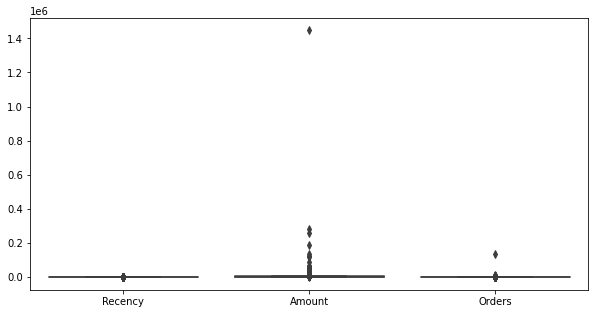

In [27]:
attributes = ['Recency', 'Amount', 'Orders']
plt.figure(figsize=(10,5))
sns.boxplot(data=df_new[attributes])
plt.show()

In [29]:
# Removing the outliers from above columns
Q1 = df_new.Recency.quantile(0.05)
Q3 = df_new.Recency.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.Recency >= Q1 - 1.5*IQR) & (df_new.Recency <= Q3 + 1.5*IQR)]

In [31]:
Q1 = df_new.Orders.quantile(0.05)
Q3 = df_new.Orders.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.Orders >= Q1 - 1.5*IQR) & (df_new.Orders <= Q3 + 1.5*IQR)]

In [32]:
Q1 = df_new.Amount.quantile(0.05)
Q3 = df_new.Amount.quantile(0.95)
IQR = Q3 - Q1
df_new = df_new[(df_new.Amount >= Q1 - 1.5*IQR) & (df_new.Amount <= Q3 + 1.5*IQR)]

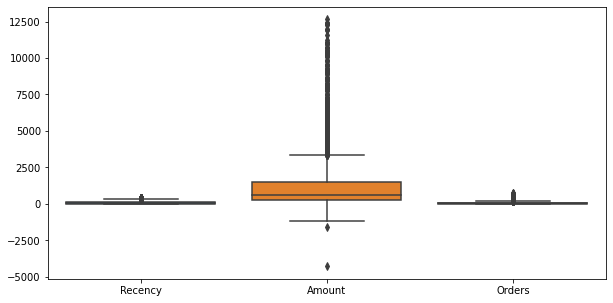

In [33]:
attributes = ['Recency', 'Amount', 'Orders']
plt.figure(figsize=(10,5))
sns.boxplot(data=df_new[attributes])
plt.show()

In [34]:
scaler = StandardScaler()
df_new_scaled = pd.DataFrame(scaler.fit_transform(df_new),columns=df_new.columns)
df_new_scaled

,CustomerID,Recency,Amount,Orders
0,-1.718138,2.300509,-0.737378,-0.754982
1,-1.717557,-0.907100,1.804824,1.077581
2,-1.716976,-0.184398,0.322702,-0.459736
3,-1.716395,-0.738800,0.299292,-0.032138
4,-1.715814,2.142108,-0.540136,-0.602268
...,...,...,...,...
4284,1.728932,1.825308,-0.630853,-0.673535
4285,1.729513,0.865005,-0.689707,-0.704077
4286,1.730094,-0.847700,-0.633213,-0.642992
4287,1.730675,-0.887300,0.469153,6.565087


In [35]:
df_new_scaled_copy = df_new_scaled.copy()
df_new_scaled_copy

,CustomerID,Recency,Amount,Orders
0,-1.718138,2.300509,-0.737378,-0.754982
1,-1.717557,-0.907100,1.804824,1.077581
2,-1.716976,-0.184398,0.322702,-0.459736
3,-1.716395,-0.738800,0.299292,-0.032138
4,-1.715814,2.142108,-0.540136,-0.602268
...,...,...,...,...
4284,1.728932,1.825308,-0.630853,-0.673535
4285,1.729513,0.865005,-0.689707,-0.704077
4286,1.730094,-0.847700,-0.633213,-0.642992
4287,1.730675,-0.887300,0.469153,6.565087


In [42]:
sse = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i,random_state=1).fit(df_new_scaled)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

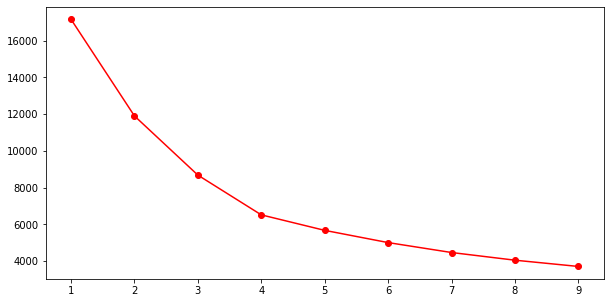

In [39]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,10)),sse,color='red',marker='o')
plt.show()

In [43]:
# Silhouette Score Calculation
sil = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i,random_state=1).fit(df_new_scaled)
  label = kmeans.predict(df_new_scaled)
  sil.append(silhouette_score(df_new_scaled,label))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

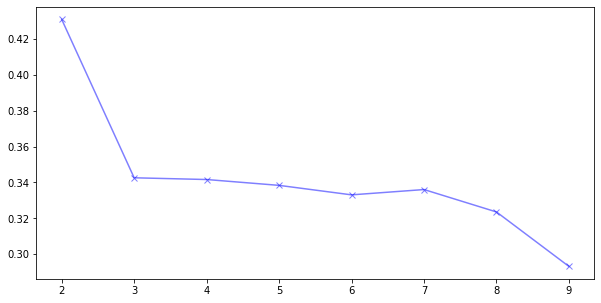

In [44]:
plt.figure(figsize=(10,5))
plt.plot(list(range(2,10)),sil,color='blue',alpha=0.5,marker='x')
plt.show()

In [55]:
# Best number of clusters is 2 as seen above from elbow and silhouette method and there use k=2 for model building
kmeans = KMeans(n_clusters=2,random_state=1).fit(df_new_scaled)
labels = kmeans.predict(df_new_scaled)
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [56]:
df_new['KMeans_Labels'] = labels
df_new

,CustomerID,Recency,Amount,Orders,KMeans_Labels
0,12346.0,325,0.00,2,0
1,12347.0,1,4310.00,182,1
2,12348.0,74,1797.24,31,0
3,12349.0,18,1757.55,73,0
4,12350.0,309,334.40,17,0
...,...,...,...,...,...
4368,18280.0,277,180.60,10,0
4369,18281.0,180,80.82,7,0
4370,18282.0,7,176.60,13,0
4371,18283.0,3,2045.53,721,1


In [57]:
mean = df_new.groupby('KMeans_Labels').mean()
median = df_new.groupby('KMeans_Labels').median()
df_new_compare = pd.concat([mean,median],axis=0)
df_new_compare.index = ['g0 mean', 'g1 mean', 'g0 median', 'g1 median']
df_new_compare.T

,g0 mean,g1 mean,g0 median,g1 median
Recency,105.133663,22.981623,63.000,12.00
Amount,709.600752,4259.918637,493.875,3611.31
Orders,44.682893,251.407351,31.000,220.00


In [60]:
category = []
for idx, row in df_new.iterrows():
  if(row['KMeans_Labels']==0):
    category.append('Rare User')
  else:
    category.append('Regular User')
df_new['Category'] = category
df_new

    

,CustomerID,Recency,Amount,Orders,KMeans_Labels,Category
0,12346.0,325,0.00,2,0,Rare User
1,12347.0,1,4310.00,182,1,Regular User
2,12348.0,74,1797.24,31,0,Rare User
3,12349.0,18,1757.55,73,0,Rare User
4,12350.0,309,334.40,17,0,Rare User
...,...,...,...,...,...,...
4368,18280.0,277,180.60,10,0,Rare User
4369,18281.0,180,80.82,7,0,Rare User
4370,18282.0,7,176.60,13,0,Rare User
4371,18283.0,3,2045.53,721,1,Regular User


In [62]:
df_new_vis = df_new.drop(columns=['CustomerID','Category'])
df_new_vis

,Recency,Amount,Orders,KMeans_Labels
0,325,0.00,2,0
1,1,4310.00,182,1
2,74,1797.24,31,0
3,18,1757.55,73,0
4,309,334.40,17,0
...,...,...,...,...
4368,277,180.60,10,0
4369,180,80.82,7,0
4370,7,176.60,13,0
4371,3,2045.53,721,1


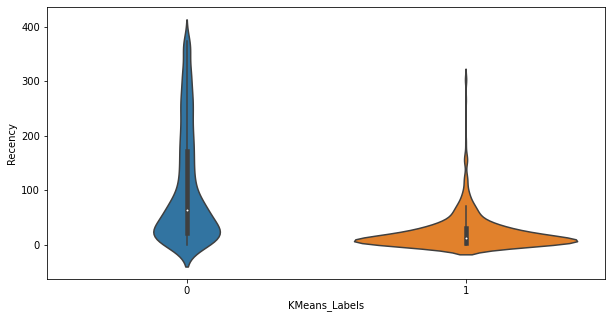

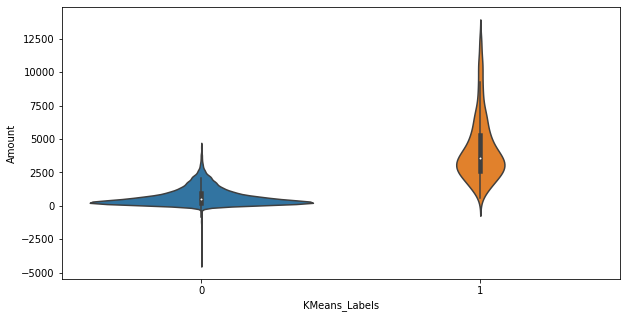

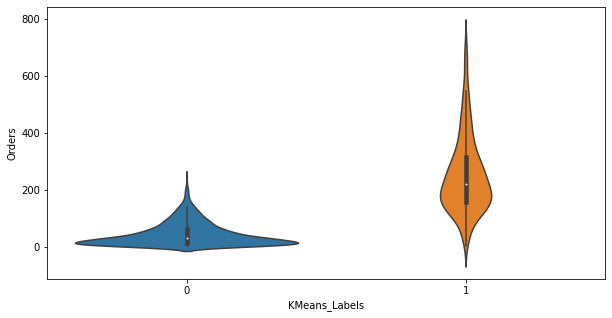

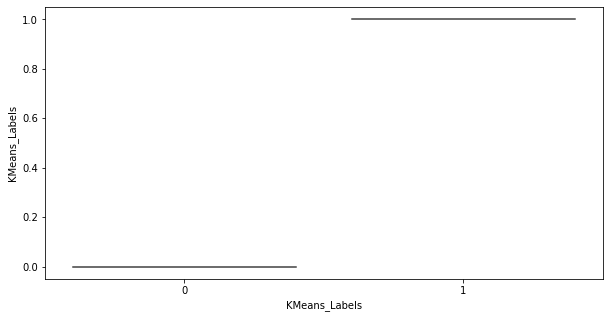

In [66]:
cols = list(df_new_vis.columns)
for col in cols:
  plt.figure(figsize=(10,5))
  sns.violinplot(x='KMeans_Labels',y=col,data=df_new_vis)
  plt.show()


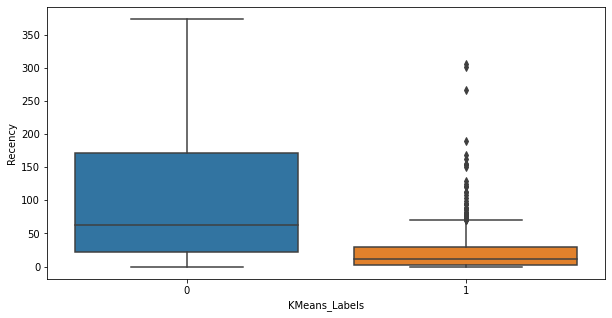

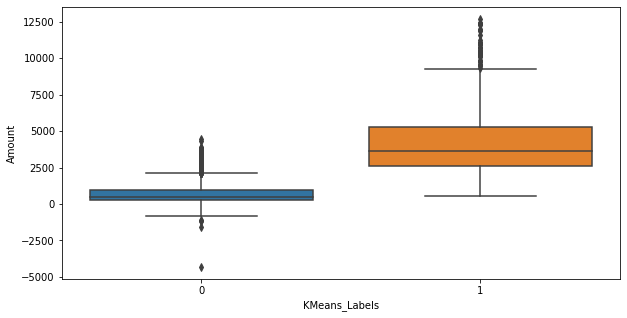

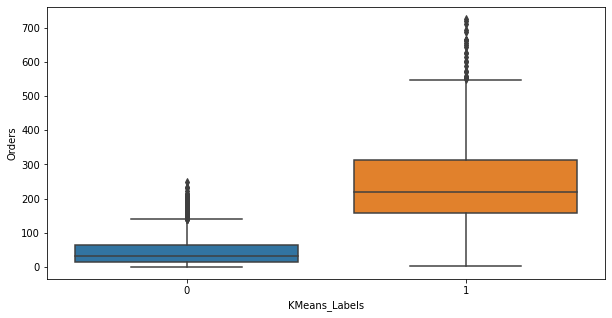

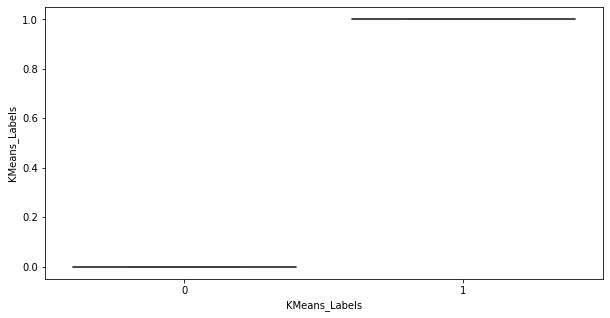

In [67]:
cols = list(df_new_vis.columns)
for col in cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(x='KMeans_Labels',y=col,data=df_new_vis)
  plt.show()

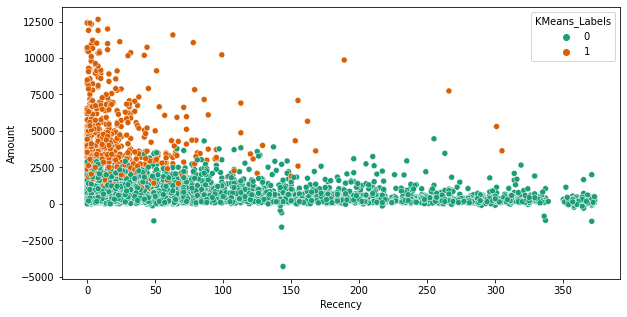

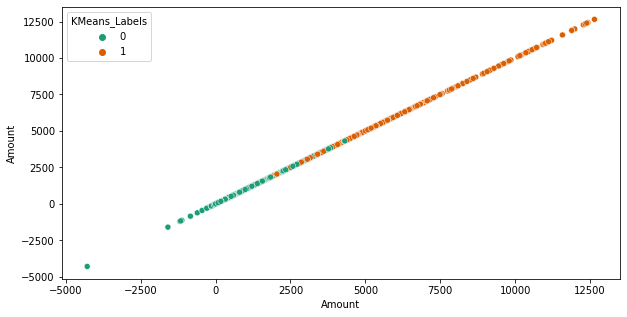

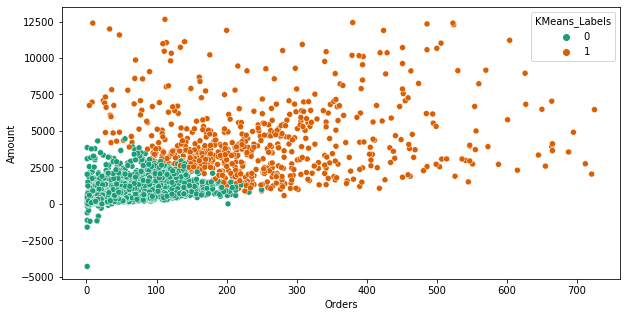

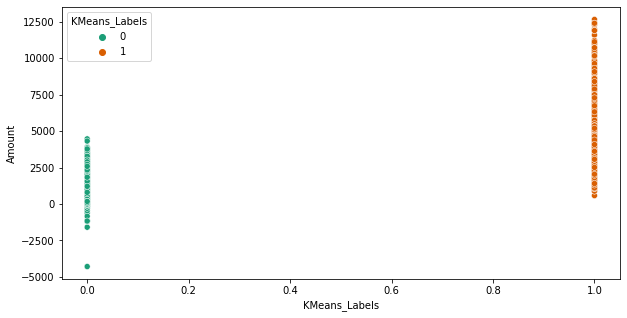

In [69]:
cols = list(df_new_vis.columns)
for col in cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=col,y='Amount',hue='KMeans_Labels',data=df_new_vis,palette='Dark2')
  plt.show()